In [2]:
from clean.prepare_data import get_train_data

X, y = get_train_data("train_data.csv")

# Simple models comparison

In [3]:
from model.models import Models
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network, discriminant_analysis, naive_bayes, gaussian_process

m = Models({
    #Ensemble Methods
    "AdaBoostClassifier": (ensemble.AdaBoostClassifier()),
    "BaggingClassifier": (ensemble.BaggingClassifier()),
    "ExtraTreesClassifier": (ensemble.ExtraTreesClassifier()),
    "GradientBoostingClassifier": (ensemble.GradientBoostingClassifier()),
    "RandomForrestClassifier": (ensemble.RandomForestClassifier(random_state=42)),

    #Gaussian Processes
    "GaussianProcessClassifier": (gaussian_process.GaussianProcessClassifier()),

    #Linear Model
    "LogisticRegression": (linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')),
    "LogisticRegressionCV": (linear_model.LogisticRegressionCV()),
    "PassiveAggressiveClassifier": (linear_model.PassiveAggressiveClassifier()),
    "RidgeClassifierCV": (linear_model.RidgeClassifierCV()),
    "SGDClassifier": (linear_model.SGDClassifier()),
    "Perceptron": (linear_model.Perceptron()),

    #Discriminant Analysis
    "LinearDiscriminantAnalysis": (discriminant_analysis.LinearDiscriminantAnalysis()),

    #Naive Bayes
    "BernoulliNB": (naive_bayes.BernoulliNB()),
    "GaussianNB": (naive_bayes.GaussianNB()),

    #Nearest Neighbor
    "KNeighborsClassifier": (neighbors.KNeighborsClassifier()),

    #SVM
    "SVC": (svm.SVC(gamma='auto', probability=True)),
    "NuSVC": (svm.NuSVC(probability=True)),
    "LinearSVC": (svm.LinearSVC()),

    #Trees
    "DecisionTreeClassifier": (tree.DecisionTreeClassifier()),
    "ExtraTreeClassifier": (tree.ExtraTreeClassifier()),
})

In [4]:
names, results = m.get_results(X, y, scoring='neg_mean_squared_error')

ing)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarni

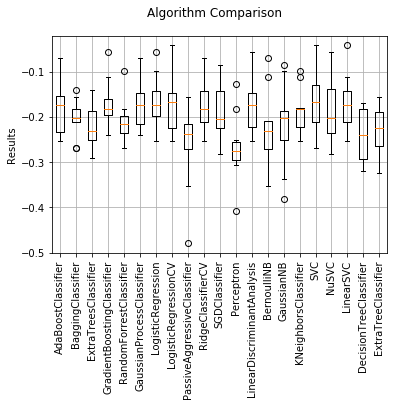

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.ylabel('Results')
plt.grid()
plt.show()

# Feature importances comparison

In [6]:
m = Models({
    #Ensemble Methods
    "AdaBoostClassifier": (ensemble.AdaBoostClassifier()),
    #"BaggingClassifier": (ensemble.BaggingClassifier()),
    "ExtraTreesClassifier": (ensemble.ExtraTreesClassifier()),
    "GradientBoostingClassifier": (ensemble.GradientBoostingClassifier()),
    "RandomForrestClassifier": (ensemble.RandomForestClassifier(random_state=42)),

    #Gaussian Processes
    #"GaussianProcessClassifier": (gaussian_process.GaussianProcessClassifier()),

    #Linear Model
    #"LogisticRegression": (linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')),
    #"LogisticRegressionCV": (linear_model.LogisticRegressionCV()),
    #"PassiveAggressiveClassifier": (linear_model.PassiveAggressiveClassifier()),
    #"RidgeClassifierCV": (linear_model.RidgeClassifierCV()),
    #"SGDClassifier": (linear_model.SGDClassifier()),
    #"Perceptron": (linear_model.Perceptron()),

    #Discriminant Analysis
    #"LinearDiscriminantAnalysis": (discriminant_analysis.LinearDiscriminantAnalysis()),

    #Naive Bayes
    #"BernoulliNB": (naive_bayes.BernoulliNB()),
    #"GaussianNB": (naive_bayes.GaussianNB()),

    #Nearest Neighbor
    #"KNeighborsClassifier": (neighbors.KNeighborsClassifier()),

    #SVM
    #"SVC": (svm.SVC(gamma='auto', probability=True)),
    #"NuSVC": (svm.NuSVC(probability=True)),
    #"LinearSVC": (svm.LinearSVC()),

    #Trees
    "DecisionTreeClassifier": (tree.DecisionTreeClassifier()),
    "ExtraTreeClassifier": (tree.ExtraTreeClassifier()),
})

In [7]:
models = m.get_list()
for name, model in models:
    print("{}: {}".format(name, model.fit(X, y).feature_importances_))

#TODO: Do something with it!

AdaBoostClassifier: [0.02 0.   0.02 0.   0.   0.02 0.   0.   0.   0.   0.04 0.04 0.02 0.
 0.02 0.   0.02 0.   0.   0.   0.02 0.   0.02 0.   0.   0.   0.   0.38
 0.26 0.12]
ExtraTreesClassifier: [0.03458426 0.03276175 0.04033949 0.05755362 0.07431904 0.01154165
 0.00792796 0.01607978 0.01228083 0.05566515 0.05426527 0.08123502
 0.00473523 0.02007822 0.01073682 0.01660568 0.01001179 0.01048005
 0.00533557 0.00090782 0.00170536 0.00893458 0.01626452 0.01154402
 0.02000498 0.0068908  0.00910507 0.17246686 0.15069036 0.04494842]
GradientBoostingClassifier: [8.11225086e-03 5.34799595e-03 1.21402596e-01 6.82173172e-03
 1.06582324e-02 3.61577054e-03 2.18947492e-03 1.05122503e-02
 2.30862748e-03 2.25342639e-03 4.46779264e-01 4.50687706e-03
 5.17428157e-02 8.44862783e-04 2.02346111e-04 1.69247609e-03
 1.08113983e-02 5.09782239e-04 0.00000000e+00 2.46457104e-04
 1.31716606e-03 2.14075873e-03 3.47612824e-03 1.75502213e-03
 9.14631325e-04 3.89421954e-04 1.39805838e-03 1.81540200e-01
 7.09470805e-02

# Tune models

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_cls = ensemble.RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_cls, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X, y)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=8),
    }

forest_cls = ensemble.RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_cls, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, y)
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=271,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
param_distribs = {
    'degree': randint(low=1, high=5),
}

svc_reg = svm.SVC(random_state=42)
rnd_search = RandomizedSearchCV(svc_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, y)
rnd_search.best_estimator_

/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
models_tuned = {
    'SVC': (svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
            kernel='rbf', max_iter=-1, probability=False, random_state=42,
            shrinking=True, tol=0.001, verbose=False)),
    'RandomForrest': (ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=271,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)),
    'LogisticRegression': (linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')),
    'GradientBoostingClassifier': (ensemble.GradientBoostingClassifier()),
}

In [12]:
m_tuned = Models(models_tuned)

In [13]:
names, results = m_tuned.get_results(X, y, scoring='neg_mean_squared_error')

/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

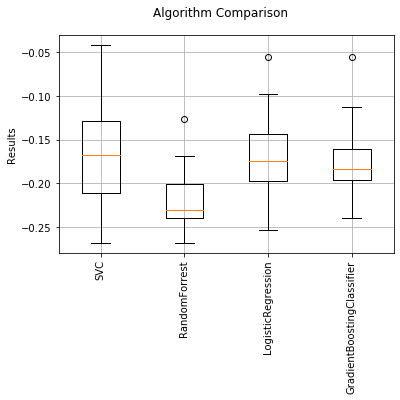

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.ylabel('Results')
plt.grid()
plt.show()

In [15]:
names, results = m_tuned.get_results(X, y, scoring='accuracy')

/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/i354518/Workspace/titanic-competition/.env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

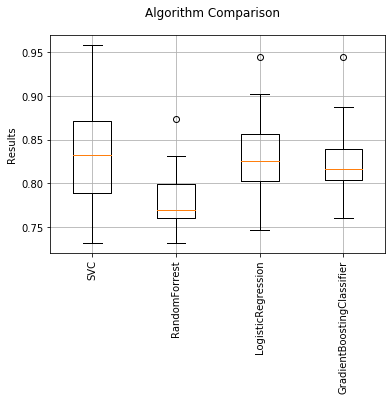

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.ylabel('Results')
plt.grid()
plt.show()